In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




In [97]:
df = pd.read_csv('/workspaces/umea/Results/Results_obesity.csv')    #("/workspaces/python-2/all_results_cp.csv")



In [98]:
# Getting unique values of 'Method'

df['Method']  = df['Method'].replace(['cp','No-cp'],['m-USP','m-uniqueness'])
unique_methods = df['Method'].unique()

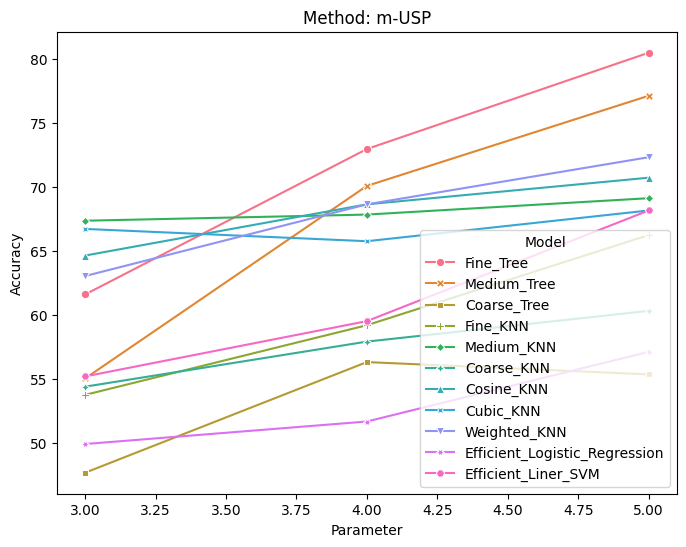

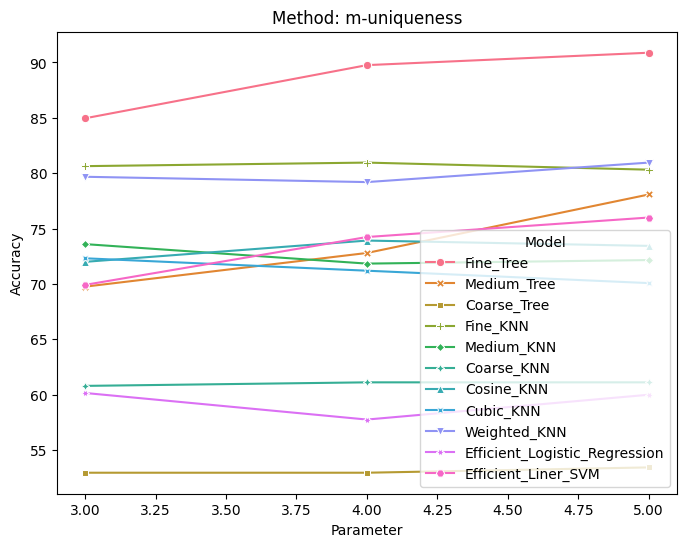

In [99]:

unique_methods.sort()

# Plotting
for method in unique_methods:
    method_data = df[df['Method'] == method]
    plt.figure(figsize=(8, 6))
    sns.lineplot(data=method_data, x='Parameter', y='Accuracy', hue='Model', style='Model', markers=True, dashes=False)
    plt.title(f'Method: {method}')
    plt.xlabel('Parameter')
    plt.ylabel('Accuracy')
    plt.legend(title='Model')
    plt.show()

In [100]:

#df = df.loc[df["Model"].isin(["Fine_KNN","Medium_KNN","Cosine_KNN","Cubic_KNN","Weighted_KNN"])]

##Fine_Tree                    
#Medium_Tree                  
##Coarse_Tree                  
#Fine_KNN                     
#Medium_KNN                   
#Coarse_KNN                   
#Cosine_KNN                   
#Cubic_KNN                    
#Weighted_KNN                 
#Efficient_Logistic_Regression
##Efficient_Liner_SVM          

#df

#models_to_remove = df[(df['Accuracy'] < 15)]['Model'].unique()

# Step 2: Filter out all instances of the identified models
#df = df[~df['Model'].isin(models_to_remove)]

#models_to_remove = df[(df['Accuracy'] > 45)]['Model'].unique()

# Step 2: Filter out all instances of the identified models
#df = df[~df['Model'].isin(models_to_remove)]


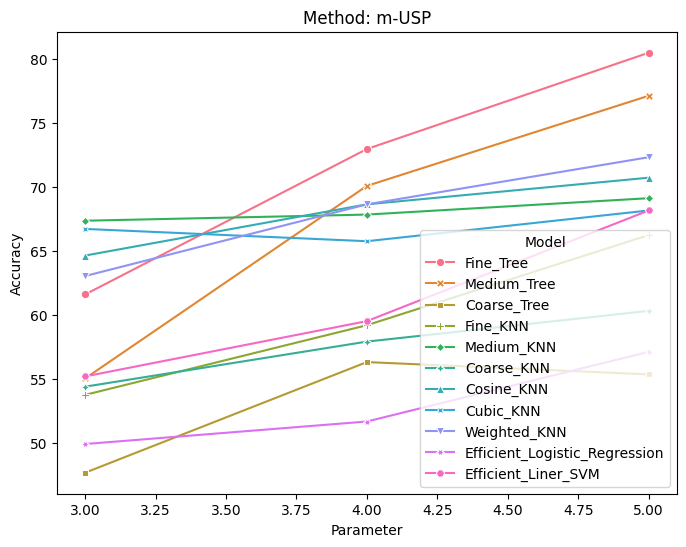

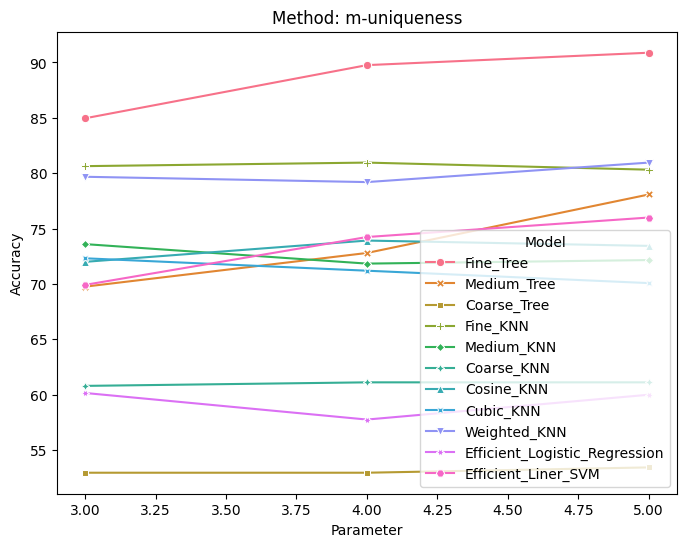

In [101]:
# Getting unique values of 'Method'
unique_methods = df['Method'].unique()
unique_methods.sort()

# Plotting
for method in unique_methods:
    method_data = df[df['Method'] == method]
    plt.figure(figsize=(8, 6))
    sns.lineplot(data=method_data, x='Parameter', y='Accuracy', hue='Model', style='Model', markers=True, dashes=False)
    plt.title(f'Method: {method}')
    plt.xlabel('Parameter')
    plt.ylabel('Accuracy')
    plt.legend(title='Model')
    plt.show()


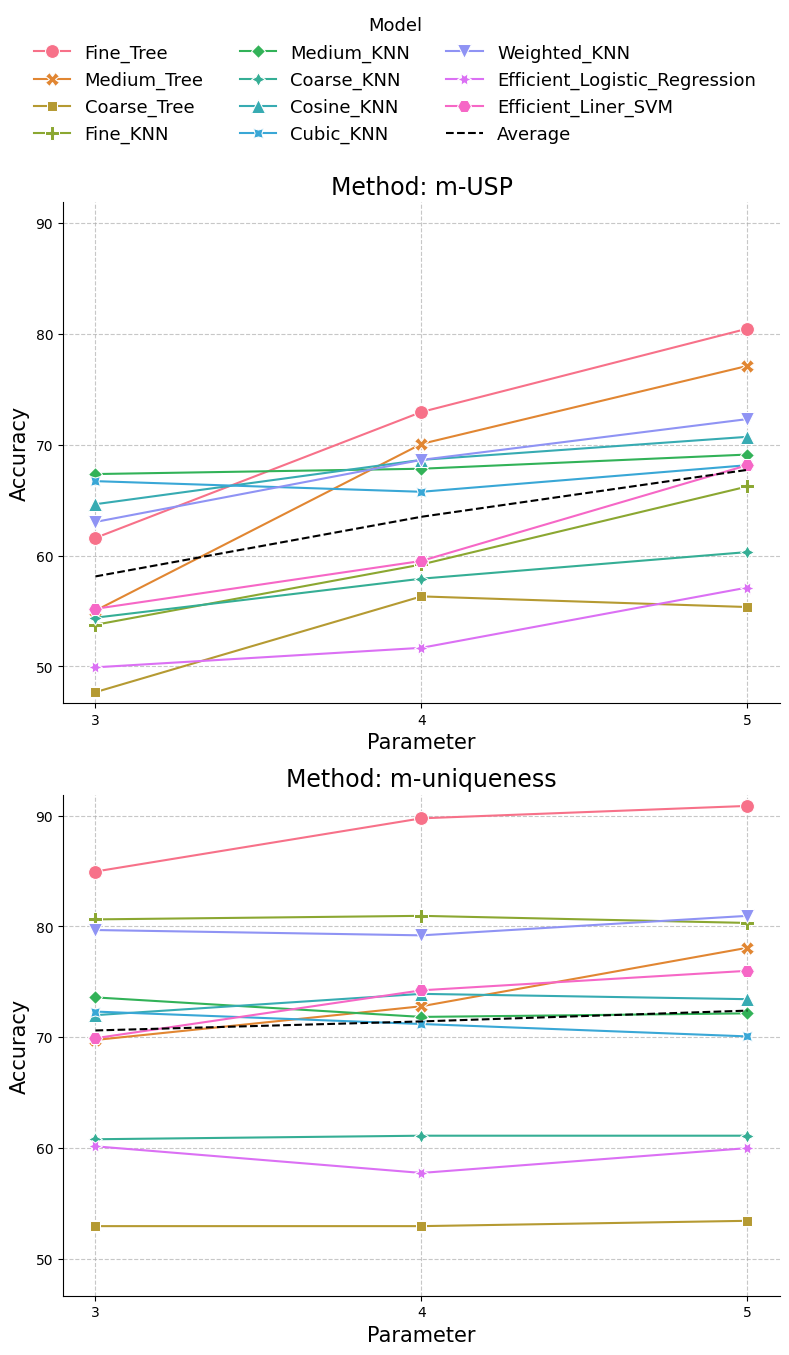

In [102]:
from matplotlib.ticker import MaxNLocator
fig, axs = plt.subplots(2, 1, figsize=(8, 12))
y_min = float('inf')
y_max = float('-inf')

font_val = 15
for i, method in enumerate(unique_methods):
    method_data = df[df['Method'] == method]
    sns.lineplot(data=method_data, x='Parameter', y='Accuracy', hue='Model', style='Model', markers=True, dashes=False, markersize=10, ax=axs[i])
    axs[i].set_title(f'Method: {method}', fontsize=font_val+2)  # Set title font size here
    axs[i].set_xlabel('Parameter', fontsize=font_val)  # Set x-axis label font size here
    axs[i].set_ylabel('Accuracy', fontsize=font_val)  # Set y-axis label font size here
    axs[i].grid(True, linestyle='--', alpha=0.7)  # Add gridlines with dashed lines and reduced opacity

    
    #axs[i].legend(title='Model')
    axs[i].legend().remove()  # Remove legend from individual subplots
    axs[i].xaxis.set_major_locator(MaxNLocator(integer=True))
    y_min = min(y_min, method_data['Accuracy'].min())
    y_max = max(y_max, method_data['Accuracy'].max())

    avg_accuracy = method_data.groupby('Parameter')['Accuracy'].mean()
    axs[i].plot(avg_accuracy.index, avg_accuracy.values, color='black', linestyle='--', label='Average')  # Add average line plot


    sns.despine(ax=axs[i])


for ax in axs:
    ax.set_ylim(y_min-1, y_max+1)

# Add common legend
handles, labels = axs[0].get_legend_handles_labels()
#fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.15), ncol=len(df['Model'].unique()), title='Model', fontsize=font_val-2)  # Set legend font size here
#fig.legend(handles, labels, title='Model', loc='right', bbox_to_anchor=(1.5, 0.5), fontsize=font_val-2,title_fontsize=font_val-2, frameon=False) #ncol=3  # Set legend font size here
fig.legend(handles, labels, title='Model', loc='lower center', bbox_to_anchor=(0.5, 1), fontsize=font_val-2,title_fontsize=font_val-2, frameon=False,ncol=3 ) 
#plt.savefig('/workspaces/python-2/CP_results/utility.pdf',bbox_inches)

plt.tight_layout()
plt.savefig('PLOTS/plot_obesity.pdf',bbox_inches='tight')
plt.show()



/tmp/ipykernel_670/3420562507.py:22: UserWarning: 
The dashes list has fewer values (1) than needed (11) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(
/tmp/ipykernel_670/3420562507.py:22: UserWarning: 
The dashes list has fewer values (1) than needed (11) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(


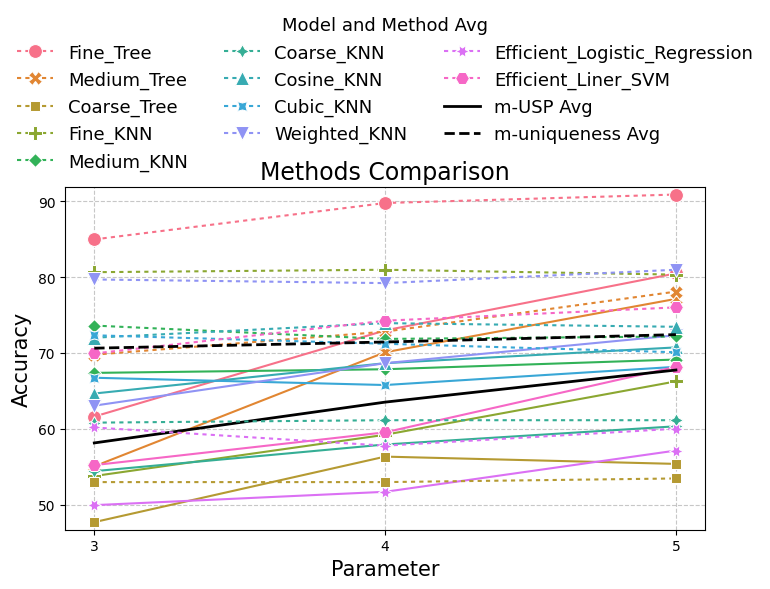

In [103]:
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt
import seaborn as sns

# Define distinct line styles for different methods
method_styles = {
    unique_methods[0]: {'linestyle': '-'},  # First method: solid line
    unique_methods[1]: {'linestyle': '--'}  # Second method: dashed line
}

fig, ax = plt.subplots(figsize=(8, 6))
y_min = float('inf')
y_max = float('-inf')

font_val = 15

# Loop over methods to plot on the same axis with distinct line styles
for method in unique_methods:
    method_data = df[df['Method'] == method]
    
    # Plot the main data using sns.lineplot (distinct line styles for each method)
    sns.lineplot(
        data=method_data, 
        x='Parameter', 
        y='Accuracy', 
        hue='Model',  # Use hue to differentiate models
        style='Model',  # Use style to differentiate models
        markers=True, 
        dashes=[(2, 2) if method == unique_methods[1] else (1, 0)],
        markersize=10, 
        ax=ax,
        legend=True  
    )
    
    # Add average line for each method with its own distinct line style
    avg_accuracy = method_data.groupby('Parameter')['Accuracy'].mean()
    ax.plot(
        avg_accuracy.index, 
        avg_accuracy.values, 
        linestyle=method_styles[method]['linestyle'], 
        linewidth=2, 
        color='black',  # Keep the average line color black for both
        label=f'{method} Avg'
    )

    y_min = min(y_min, method_data['Accuracy'].min())
    y_max = max(y_max, method_data['Accuracy'].max())

# Customize the single axis
ax.set_title('Methods Comparison', fontsize=font_val + 2)
ax.set_xlabel('Parameter', fontsize=font_val)
ax.set_ylabel('Accuracy', fontsize=font_val)
ax.grid(True, linestyle='--', alpha=0.7)
ax.set_ylim(y_min - 1, y_max + 1)

# Add a single legend for both models and the method-specific line types
handles, labels = ax.get_legend_handles_labels()

# Filter out duplicates in the legend for models
unique_handles_labels = dict(zip(labels, handles))  # Remove duplicates by creating a dictionary

# Add the filtered legend (no duplicates) and the method-specific line styles
ax.legend(unique_handles_labels.values(), unique_handles_labels.keys(), 
          title='Model and Method Avg', loc='lower center', bbox_to_anchor=(0.5, 1),
          fontsize=font_val - 2, title_fontsize=font_val - 2, frameon=False, ncol=3)


ax.xaxis.set_major_locator(MaxNLocator(integer=True))

# Adjust layout and save
plt.tight_layout()
plt.savefig('PLOTS/plot_obesity.pdf', bbox_inches='tight')
plt.show()


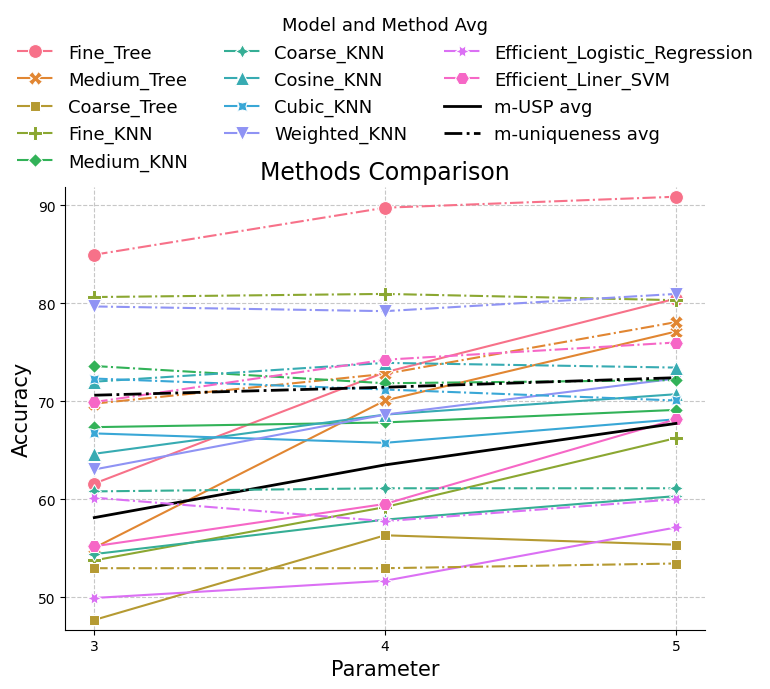

In [104]:
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt
import seaborn as sns

# Define distinct line styles for different methods
method_styles = {
    unique_methods[0]: {'linestyle': '-'},  # First method: dashed line
    unique_methods[1]: {'linestyle': '-.'}   # Second method: dashed-dot line
}

fig, ax = plt.subplots(figsize=(8, 7))
y_min = float('inf')
y_max = float('-inf')

font_val = 15

sns.despine()

# Loop over methods to plot on the same axis with distinct line styles
for method in unique_methods:
    method_data = df[df['Method'] == method]
    
    # Plot the main data using sns.lineplot (distinct line styles for each method)
    sns.lineplot(
        data=method_data, 
        x='Parameter', 
        y='Accuracy', 
        hue='Model',  # Use hue to differentiate models
        style = 'Model',
        linestyle=['-' if method == unique_methods[0] else '-.' ][0],  # Use style to differentiate models
        markers=True, 
        dashes=False,  # We will handle the linestyles with method_styles
        markersize=10, 
        ax=ax,
        legend=True  
    )   
    # Add average line for each method with its own distinct line style (dashed or dash-dot)
    avg_accuracy = method_data.groupby('Parameter')['Accuracy'].mean()
    ax.plot(
        avg_accuracy.index, 
        avg_accuracy.values, 
        linestyle=method_styles[method]['linestyle'],  # Apply dashed or dash-dot linestyle
        linewidth=2, 
        color='black',  # Keep the average line color black for both
        label=f'{method} avg'
    )

    y_min = min(y_min, method_data['Accuracy'].min())
    y_max = max(y_max, method_data['Accuracy'].max())

# Customize the single axis
ax.set_title('Methods Comparison', fontsize=font_val + 2)
ax.set_xlabel('Parameter', fontsize=font_val)
ax.set_ylabel('Accuracy', fontsize=font_val)
ax.grid(True, linestyle='--', alpha=0.7)
ax.set_ylim(y_min - 1, y_max + 1)

# Add a single legend for both models and the method-specific line types
handles, labels = ax.get_legend_handles_labels()

# Filter out duplicates in the legend for models
unique_handles_labels = dict(zip(labels, handles))  # Remove duplicates by creating a dictionary

# Add the filtered legend (no duplicates) and the method-specific line styles
ax.legend(unique_handles_labels.values(), unique_handles_labels.keys(), 
          title='Model and Method Avg', loc='lower center', bbox_to_anchor=(0.5, 1),
          fontsize=font_val - 2, title_fontsize=font_val - 2, frameon=False, ncol=3)

# Force x-axis to display integer values only
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

# Adjust layout and save
plt.tight_layout()
plt.savefig('PLOTS/plot_obesity_merged.pdf', bbox_inches='tight')
plt.show()
